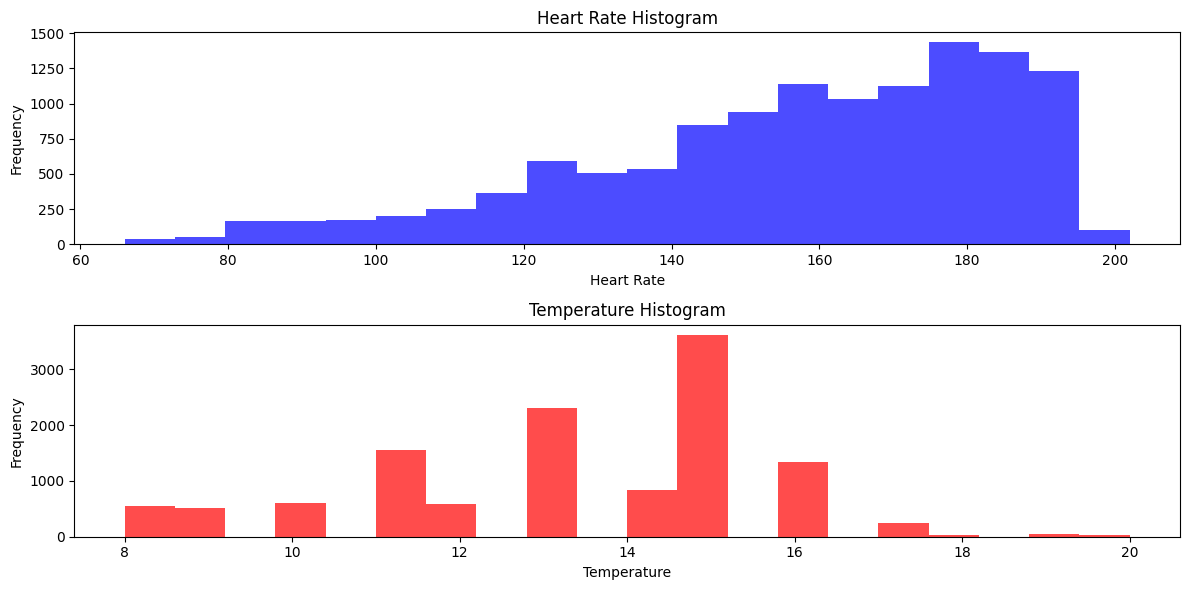

Mean Heart Rate: 157.09547492865877
Median Temperature: 14.0
Standard Deviation of Heart Rate: 28.032915606050345


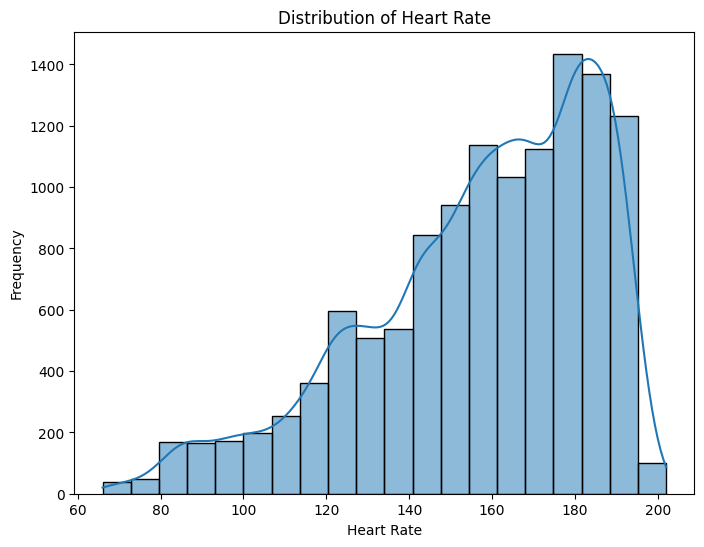

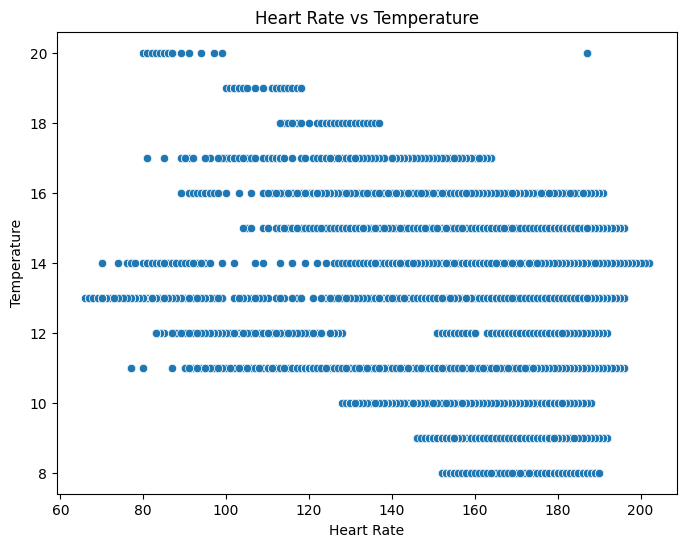

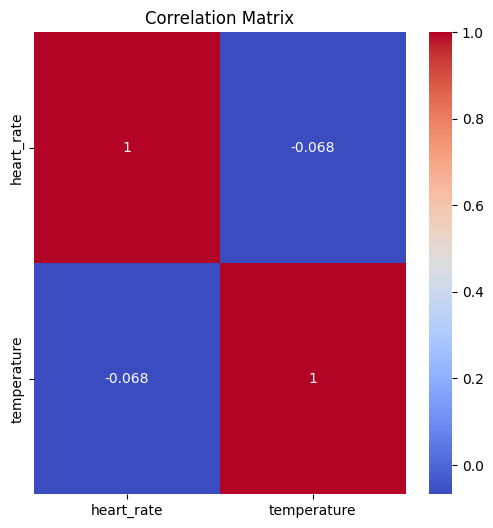

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load your data into a pandas DataFrame
data = pd.read_csv("ExerciseData_combined_csv_user4.csv", low_memory=False)

# Data Preprocessing

# Convert 'heart_rate' and 'temperature' to numeric
data['heart_rate'] = pd.to_numeric(data['heart_rate'], errors='coerce')
data['temperature'] = pd.to_numeric(data['temperature'], errors='coerce')

# Handle missing data
data['heart_rate'].fillna(method='ffill', inplace=True)
data['temperature'].fillna(method='bfill', inplace=True)

# Plotting Histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.hist(data['heart_rate'], bins=20, color='blue', alpha=0.7)
plt.title('Heart Rate Histogram')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(data['temperature'], bins=20, color='red', alpha=0.7)
plt.title('Temperature Histogram')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Compute Statistics
mean_heart_rate = data['heart_rate'].mean()
median_temperature = data['temperature'].median()
std_dev_heart_rate = data['heart_rate'].std()

print(f"Mean Heart Rate: {mean_heart_rate}")
print(f"Median Temperature: {median_temperature}")
print(f"Standard Deviation of Heart Rate: {std_dev_heart_rate}")

# Distribution and Scatter Plot
plt.figure(figsize=(8, 6))
sns.histplot(data['heart_rate'], bins=20, kde=True)
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Heart Rate')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='heart_rate', y='temperature', data=data)
plt.xlabel('Heart Rate')
plt.ylabel('Temperature')
plt.title('Heart Rate vs Temperature')
plt.show()

# Correlation Heatmap
correlation_matrix = data[['heart_rate', 'temperature']].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



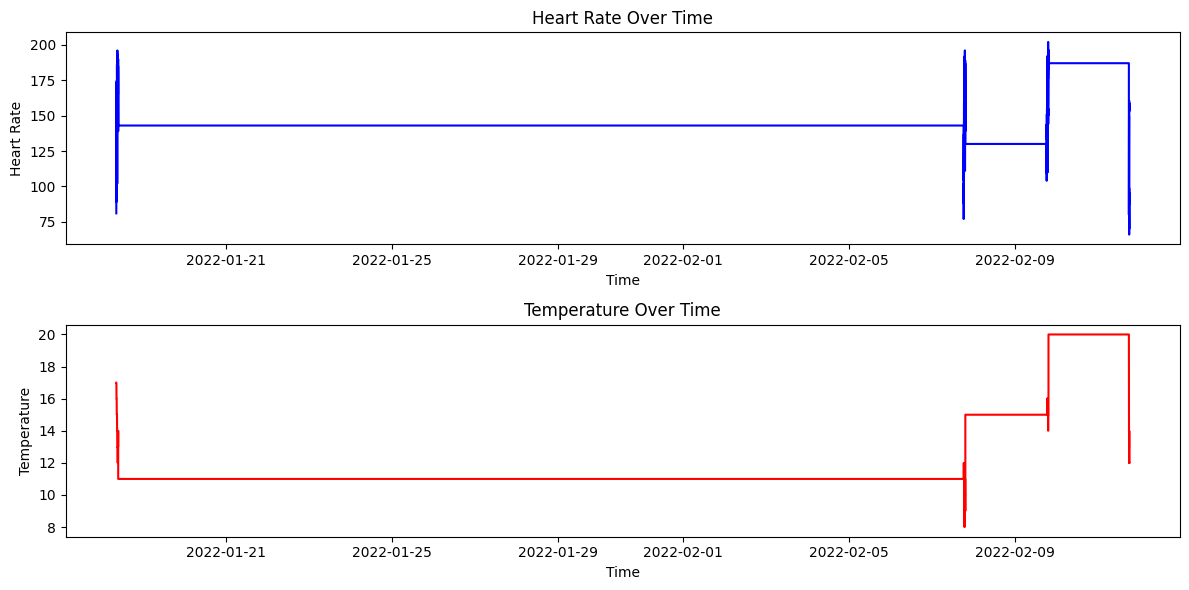

In [ ]:
# Convert 'timestamp' to datetime with timezone
data['timestamp'] = pd.to_datetime(data['timestamp'], utc=True)

# Set 'timestamp' as the index
data.set_index('timestamp', inplace=True)

# Convert 'heart_rate' and 'temperature' to numeric
X = data['heart_rate'] = pd.to_numeric(data['heart_rate'], errors='coerce')
y = data['temperature'] = pd.to_numeric(data['temperature'], errors='coerce')

# Plotting heart rate and temperature
plt.figure(figsize=(12, 6))

# Heart Rate
plt.subplot(2, 1, 1)  # Create a subplot for heart rate
plt.plot(data['heart_rate'], color='blue')
plt.title('Heart Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')

# Temperature
plt.subplot(2, 1, 2)  # Create a subplot for temperature
plt.plot(data['temperature'], color='red')
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.tight_layout()  # Adjust layout to prevent overlap of plots
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


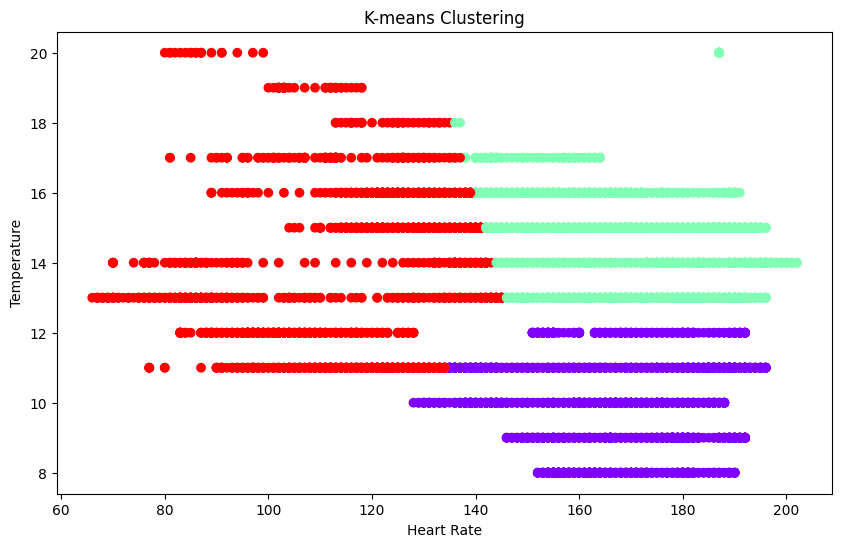

In [ ]:
# Replace 'None' values with NaN
data.replace('None', float('nan'), inplace=True)

# Convert 'temperature' and 'heart_rate' columns to numeric
data['temperature'] = pd.to_numeric(data['temperature'], errors='coerce')
data['heart_rate'] = pd.to_numeric(data['heart_rate'], errors='coerce')

# Drop rows with missing values
data.dropna(subset=['temperature', 'heart_rate'], inplace=True)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['temperature', 'heart_rate']])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Perform K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(principal_components)

# Add cluster labels to the dataset
data['cluster'] = cluster_labels

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['heart_rate'], data['temperature'], c=data['cluster'], cmap='rainbow')
plt.xlabel('Heart Rate')
plt.ylabel('Temperature')
plt.title('K-means Clustering')
plt.show()


In [ ]:
# Convert 'temperature' and 'heart_rate' columns to numeric
data['temperature'] = pd.to_numeric(data['temperature'], errors='coerce')
data['heart_rate'] = pd.to_numeric(data['heart_rate'], errors='coerce')

# Drop rows with missing values in 'temperature' and 'heart_rate'
data.dropna(subset=['temperature', 'heart_rate'], inplace=True)

# Check unique values in 'heart_rate' column
print("\nUnique values in 'heart_rate' column:")
print(data['heart_rate'].unique())

# Check unique values in 'temperature' column
print("\nUnique values in 'temperature' column:")
print(data['temperature'].unique())

# Summary statistics for 'temperature' and 'heart_rate'
print("\nSummary statistics for 'temperature':")
print(data['temperature'].describe())

print("\nSummary statistics for 'heart_rate':")
print(data['heart_rate'].describe())



Unique values in 'heart_rate' column:
[ 81.  85.  89.  92.  95.  96.  98.  99. 100. 101.  91.  90. 104. 106.
 107. 105. 102. 103. 109. 110. 111. 112. 113. 114. 116. 118. 119. 121.
 122. 123. 124. 125. 126. 127. 128. 129. 130. 132. 135. 138. 142. 145.
 147. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161. 162.
 163. 164. 149. 148. 146. 144. 143. 140. 139. 136. 134. 120. 117. 131.
 133.  93.  94.  97. 137. 141. 165. 166. 167. 168. 169. 170. 171. 172.
 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186.
 187. 188. 189. 190. 108. 191. 192. 193. 194. 195. 196.  77.  80.  87.
 115.  88. 197. 198. 199. 200. 201. 202.  82.  83.  84.  86.  79.  78.
  76.  75.  73.  71.  70.  69.  67.  66.  68.  72.  74.]

Unique values in 'temperature' column:
[17. 16. 15. 14. 13. 12. 11. 10.  9.  8. 20. 19. 18.]

Summary statistics for 'temperature':
count    12265.000000
mean        13.269874
std          2.366127
min          8.000000
25%         11.000000
50%         14.000000


In [ ]:
# Summarize the SHAP values
shap.summary_plot(shap_values[:, :, 30], X_test.values, feature_names=['temperature'])


NameError: ignored

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

app = dash.Dash(__name__)

# Load your data
data = pd.read_csv("ExerciseData_combined_csv_user4.csv")

# Define the app layout
app.layout = html.Div([
    dcc.Graph(id='line-plot'),
    dcc.Dropdown(id='column-selector', options=[{'label': col, 'value': col} for col in data.columns]),
])

# Define callback to update the line plot based on column selection
@app.callback(
    Output('line-plot', 'figure'),
    Input('column-selector', 'value')
)
def update_line_plot(selected_column):
    fig = px.line(data, x='timestamp', y=selected_column, title=f'{selected_column} Over Time')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-34-fb9f6d5d2279>:11: DtypeWarning:

Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.



<IPython.core.display.Javascript object>

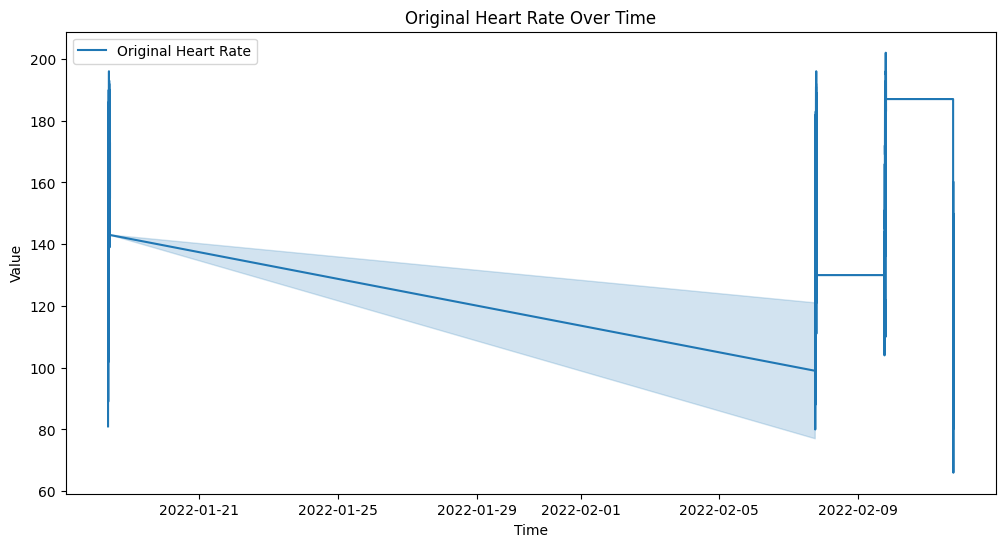

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='heart_rate', data=data, label='Original Heart Rate')
plt.title('Original Heart Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


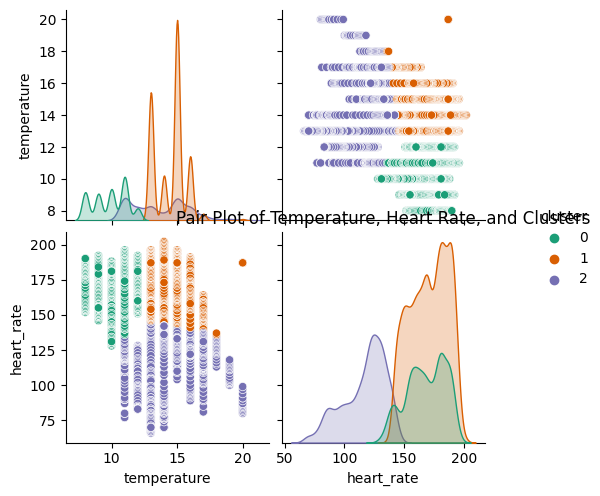

In [ ]:
sns.pairplot(data[['temperature', 'heart_rate', 'cluster']], hue='cluster', palette='Dark2')
plt.title('Pair Plot of Temperature, Heart Rate, and Clusters')
plt.show()
